In [1]:
import numpy
from scipy.stats import bernoulli, beta, uniform

In [2]:
thetas = numpy.array([0.9, 0.8, 0.7])
k = thetas.shape[0]

In [44]:
N = 500
sims = 5_000

In [45]:
observations = bernoulli(thetas).rvs((N, sims, k))

## Greedy

In [109]:
# priors
alphas = numpy.ones((sims, k))
betas = numpy.ones((sims, k))
# add little noise so argmax choses random element
alphas += numpy.random.normal(numpy.zeros_like(alphas), 1e-8)
actions_g = []
idx = numpy.arange(sims)

N_warm = 10

for t in range(N_warm):
    action = numpy.random.choice(k, size=sims)
    r = observations[t, idx, action]
    alphas[idx, action] += r
    betas[idx, action] += (1-r)
    actions_g.append(action)

for t in range(N-N_warm):
    
    theta_hat = alphas / (alphas + betas) # mean of Beta dist.
    action = numpy.argmax(theta_hat, axis=1)
    r = observations[t, idx, action]
    alphas[idx, action] += r
    betas[idx, action] += (1-r)
    actions_g.append(action)

In [110]:
a_g = numpy.array(actions_g)

In [111]:
import matplotlib.pyplot as plt

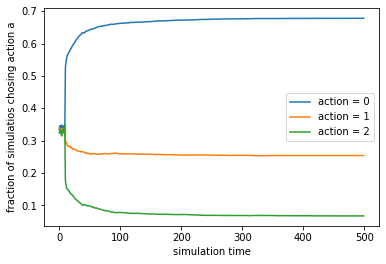

In [112]:
for a in range(3):
    plt.plot((a_g == a).mean(axis=1), label=f"action = {a}")
plt.xlabel("simulation time")
plt.ylabel("fraction of simulatios chosing action a")
plt.legend()

In [95]:
numpy.random.choice(range(3), size=10)

array([2, 1, 0, 0, 2, 0, 0, 1, 0, 1])

In [117]:
# priors
alphas = numpy.ones((sims, k))
betas = numpy.ones((sims, k))
epsilon = 0.2
# add little noise so argmax choses random element
alphas += numpy.random.normal(numpy.zeros_like(alphas), 1e-8)
actions_eg = []
idx = numpy.arange(sims)

for t in range(N):
    theta_hat = alphas / (alphas + betas) # mean of Beta dist.
    action = numpy.argmax(theta_hat, axis=1)
    random_action = numpy.random.choice(range(k), size=sims)
    random_mask = numpy.random.uniform(0, 1, size=sims) < epsilon
    action[random_mask] = random_action[random_mask]
    r = observations[t, idx, action]
    alphas[idx, action] += r
    betas[idx, action] += (1-r)
    actions_eg.append(action)

In [118]:
a_eg = numpy.array(actions_eg)

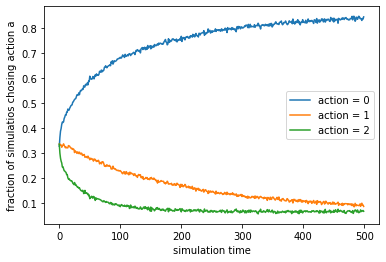

In [119]:
for a in range(3):
    plt.plot((a_eg == a).mean(axis=1), label=f"action = {a}")
plt.xlabel("simulation time")
plt.ylabel("fraction of simulatios chosing action a")
plt.legend()

## Thompson Sampling

In [120]:
# priors
alphas = numpy.ones((sims, k))
betas = numpy.ones((sims, k))
actions_t = []
dists = []
idx = numpy.arange(sims)

for t in range(N):
    
    theta_hat = beta(alphas, betas).rvs((sims, k))
    action = numpy.argmax(theta_hat, axis=1)
    r = observations[t, idx, action]
    alphas[idx, action] += r
    betas[idx, action] += (1-r)
    
    actions_t.append(action)
    dists.append(beta(alphas.copy(), betas.copy()))

In [121]:
a_t = numpy.array(actions_t)

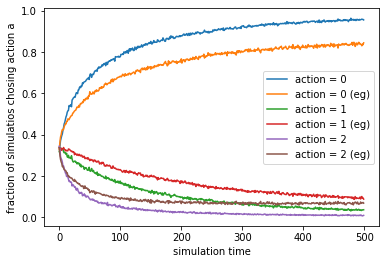

In [122]:
for a in range(3):
    plt.plot((a_t == a).mean(axis=1), label=f"action = {a}")
    plt.plot((a_eg == a).mean(axis=1), label=f"action = {a} (eg)")
plt.xlabel("simulation time")
plt.ylabel("fraction of simulatios chosing action a")
plt.legend()

In [57]:
import pandas

In [58]:
d = dists[9]

In [59]:
d.rvs([5000, 3])[:,0]

array([0.91956229, 0.87064332, 0.96936886, ..., 0.97346933, 0.72425398,
       0.84714703])

In [61]:
samples = pandas.DataFrame({
    t: dists[t-1].rvs([sims, k])[:,0]
    for t in [1, 10, 50, 100, 400, 500]
})

In [62]:
import seaborn as sns

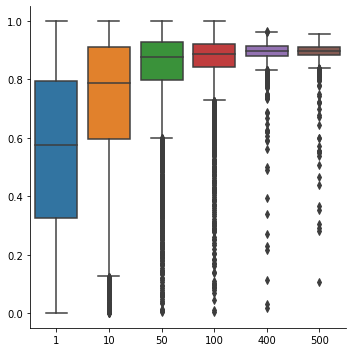

In [63]:
sns.catplot(data=samples, kind='box')

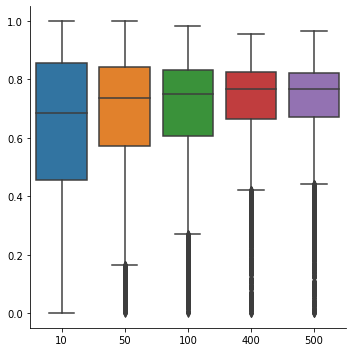

In [66]:
samples = pandas.DataFrame({
    t: dists[t-1].rvs([sims, k])[:,1]
    for t in [10, 50, 100, 400, 500]
})
sns.catplot(data=samples, kind='box')

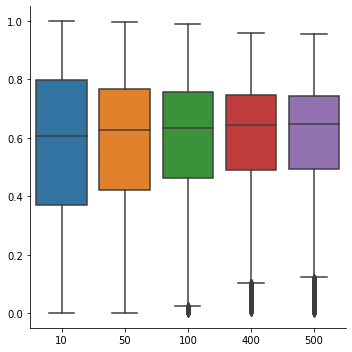

In [67]:
samples = pandas.DataFrame({
    t: dists[t-1].rvs([sims, k])[:,2]
    for t in [10, 50, 100, 400, 500]
})
sns.catplot(data=samples, kind='box')